# Proyek Analisis Data: [Data Penyewaan Sepeda (Bike Sharing Dataset)]
- **Nama:** Ibnu Aditya Pamungkas
- **Email:** b25b9d056@student.devacademy.id
- **ID Dicoding:** b25b9d056

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berbeda di setiap musim, dan faktor apa yang mungkin memengaruhinya?
- Bagaimana distribusi penyewaan sepeda sepanjang bulan, dan bulan mana yang menunjukkan puncak penyewaan?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
url_day = "https://raw.githubusercontent.com/ibnuaditya-tech/Data-Analisis1/refs/heads/main/day.csv"
day_df = pd.read_csv(url_day)

url_hour = "https://raw.githubusercontent.com/ibnuaditya-tech/Data-Analisis1/main/hour.csv"
hour_df = pd.read_csv(url_hour)

print("Dataset harian (day.csv):")
print(day_df.head(), "\n")

print("Dataset per jam (hour.csv):")
print(hour_df.head(), "\n")

Dataset harian (day.csv):
   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Dataset pe

**Insight:**
- dilakukan pengambil data dari url untuk dilakukan proses analisis
- menampilkan data harian dan perjam pada output dengan tampilan hanya pada 5 bagian teratas pada data

### Assessing Data

In [7]:
print("Dataset day")
print(day_df.info())
print("Statistik dataset day:")
print(day_df.describe())
print("Jumlah data duplikat dataset day:", )
print(day_df.duplicated().sum())
print("Jumlah null per kolom dataset day:")
print(day_df.isnull().sum())

print("Dataset hour")
print(hour_df.info())
print("Statistik dataset hour:")
print(hour_df.describe())
print("Jumlah data duplikat dataset hour:")
print(hour_df.duplicated().sum())
print("Jumlah null per kolom dataset hour:")
print(hour_df.isnull().sum())

Dataset day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Statistik dataset day:
          instant      season          yr        mnth

**Insight:**
- Melihat dan mengetahui statistik daya yang akan diolah seperti jumlah data, rata-rata dan nilai maksimal dan minimal
- untuk mengetahui apakah terdapat  data yang duplikat dan hilang,dan  diketahui dalam data tidak ada data hilang ataupun data duplikat

### Cleaning Data

In [8]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df['month'] = day_df['dteday'].dt.month
hour_df['month'] = hour_df['dteday'].dt.month

season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

**Insight:**
- Menjalankan fungsi menghapus data duplikat agar memastikan tidak ada kesalahan saat dilakukan perhitungan dan rata-rata data
- Mengkonversi data tanggal ke bulan agar dapat digunakan untuk membuat rata-rata penyewaan per bulan dan membuat visualisasinya
- Mengubah keterangan musim dari data yang awalnya hanya keteranganya berupa angka diganti ke dalam teks

## Exploratory Data Analysis (EDA)

In [9]:
season_avg = day_df.groupby('season')['cnt'].mean().reset_index()
print("Rata-rata jumlah penyewa berdasarkan musim:")
print(season_avg, "\n")

month_avg = day_df.groupby('month')['cnt'].mean().reset_index()
print("Rata-rata jumlah penyewa berdasarkan bulan:")
print(month_avg, "\n")

hour_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()
print("Rata-rata penyewaan per jam:")
print(hour_avg)

Rata-rata jumlah penyewa berdasarkan musim:


   season          cnt
0    Fall  5644.303191
1  Spring  2604.132597
2  Summer  4992.331522
3  Winter  4728.162921 

Rata-rata jumlah penyewa berdasarkan bulan:
    month          cnt
0       1  2176.338710
1       2  2655.298246
2       3  3692.258065
3       4  4484.900000
4       5  5349.774194
5       6  5772.366667
6       7  5563.677419
7       8  5664.419355
8       9  5766.516667
9      10  5199.225806
10     11  4247.183333
11     12  3403.806452 

Rata-rata penyewaan per jam:
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


**Insight:**
- Mengetahui rata-rata per musim dan per bulan dengan menggunakan fungsi mean dari data season dan cnt, sedangkan untuk menghitung rata rata bulan menggunakan data month yang di dapatkan dari fungsi sebelumnya dan data cnt


## Visualization & Explanatory Analysis

### Pertanyaan 1:

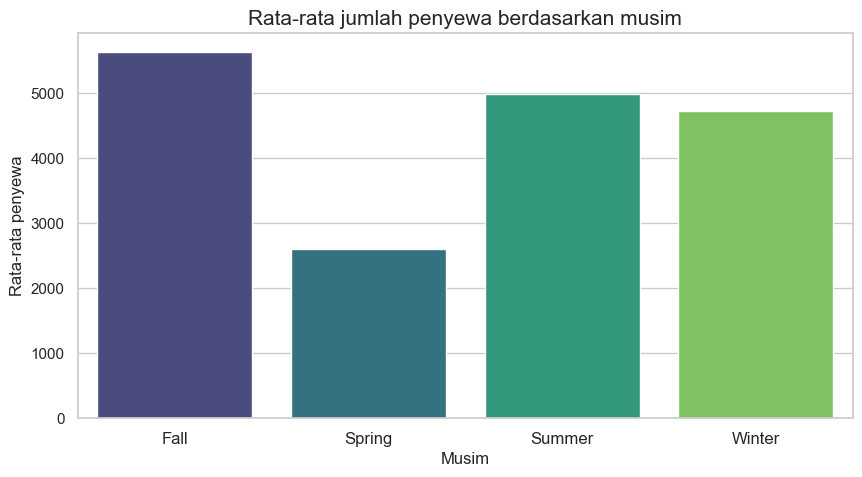

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=season_avg,
    x='season',
    y='cnt',
    hue='season',
    palette='viridis',
    legend=False
)
plt.title("Rata-rata jumlah penyewa berdasarkan musim", fontsize=15, loc="center")
plt.xlabel("Musim")
plt.ylabel("Rata-rata penyewa")
plt.tick_params(axis='x', labelsize=12)
plt.show()



### Pertanyaan 2:

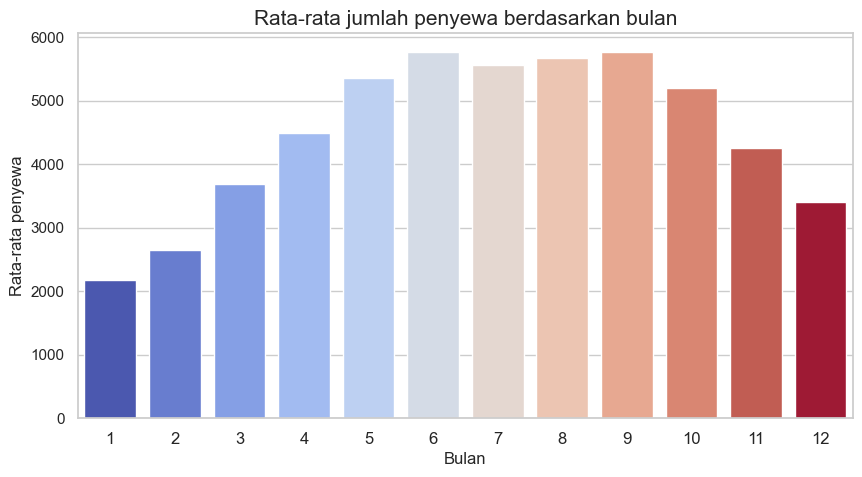

Rata-rata penyewaan per jam:
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


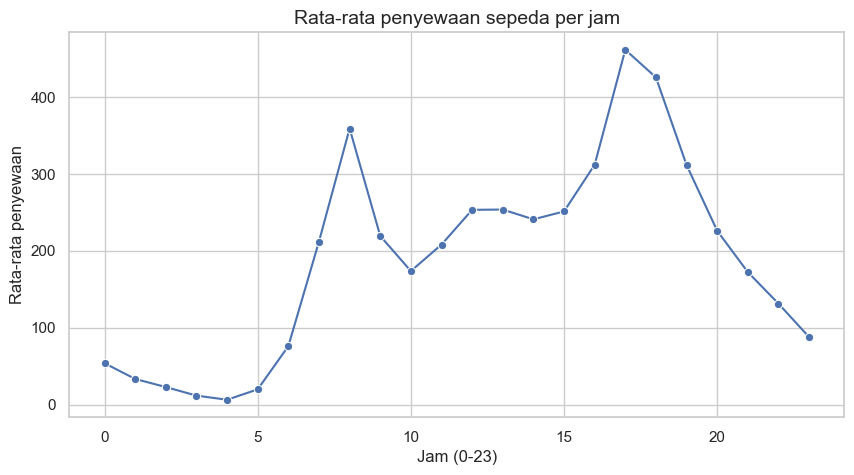

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=month_avg,
    x='month',
    y='cnt',
    hue='month',
    palette='coolwarm',
    legend=False
)
plt.title("Rata-rata jumlah penyewa berdasarkan bulan", fontsize=15, loc="center")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata penyewa")
plt.tick_params(axis='x', labelsize=12)
plt.show()

#tambahan jam
hour_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()
print("Rata-rata penyewaan per jam:")
print(hour_avg)

plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_avg, x='hr', y='cnt', marker='o')
plt.title("Rata-rata penyewaan sepeda per jam", fontsize=14)
plt.xlabel("Jam (0-23)")
plt.ylabel("Rata-rata penyewaan")
plt.grid(True)
plt.show()

**Insight:**
- dilakukan pembuatan visualisasi dari data yang didapatkan dengan dilakukan penyesuaian pada ukuran gambar diagaram warna yang ada didalamnya besar huruf, keterangan huruf dan lain sebagainya
- Sehingga didapatkan visualisasi yang menunjukan perbandingan tingkat penyewaan sepeda dengan lebih mudah

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis diketahui musim summer memiliki rata-rata penyewaan tertinggi yaitu sekitar 4.992 penyewa per hari, diikuti oleh winter dengan rata-rata 4.728 penyewa per hari. Sementara itu, musim spring mencatat rata-rata 2.604 penyewa per hari, dan yang terendah terjadi pada musim gugur fall dengan rata-rata 5.644 penyewa per hari. Hal ini disebabkan karena pada musim spring, cuaca cenderung tidak menentu — terkadang hujan dan terkadang panas. Sementara itu, musim fall memiliki suhu yang relatif nyaman, yaitu peralihan dari panas ke dingin, sehingga lebih stabil dan mendukung aktivitas bersepeda.
- Analisis pada bulan peningkatan signifikan mulai bulan maret 3.692 penyewa hingga mencapai puncaknya pada bulan juni 5.772 penyewa, kemudian stabil hingga september sebelum menurun kembali pada akhir tahun, dengan nilai terendah pada bulan januari 2.176 penyewa.
- Dengan mengetahui musim dan bulan yang paling banyak diminati dalam jasa penyewaan sepeda dapat diprediksi dan dilakukan tindakan seperti meningkatkan jumlah pelanggan dengan diskon atau membuat paket harian pada musim yang stabil sedangkan pada bulan penyewaan terendah dapat  berfokus pada pemeliharaan sepeda, perbaikan fasilitas, dan evaluasi layanan untuk meningkatkan kualitas di bulan dan musim berikutnya
